In [8]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Importamos dataset de Wisconsin Breast Cancer

In [10]:
pwd

'/Users/palazzom/Dropbox/clusterai/clase_03'

In [11]:
breast = pd.read_csv('/Users/palazzom/Dropbox/clusterai/clase_03/clase_03_breast_wiscon_data.csv', delimiter=';')

In [12]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
breast.shape

(569, 32)

# Reviso que no existan valores nulos en mi dataset

In [14]:
breast.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

# Separo mi variable independiente X

In [17]:
x = breast.iloc[:,2:5]

In [18]:
x.head()

,radius_mean,texture_mean,perimeter_mean
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10


# Separo mi variable dependiente Y

In [19]:
y = breast.iloc[:,1]

In [20]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

## Transformo mi variable dependiente Y en numerica (previamente estaba como string)

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

## Separo mi dataset en Train y Test

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

## Auto-Scaling utilizando muestras de train 

In [24]:
# Step 4: auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
xtrain_scal = scaler.transform(xtrain)  
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[ -2.99034945e-16   6.11459515e-16   7.00723678e-16]
[ 1.  1.  1.]


In [26]:
xtest_scal = scaler.transform(xtest)  
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[-0.06906577 -0.00308711 -0.0660091 ]
[ 0.99689744  0.95133428  0.9876075 ]


## Entrenar modelo KNN

In [41]:
# defino modelo KNN llamado "neigh"
neigh = KNeighborsClassifier(n_neighbors=2)

In [28]:
# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
neigh.fit(xtrain_scal, ytrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = neigh.predict(xtest_scal)

In [30]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.894736842105


In [44]:
#compute and plot AUC
fpr1, tpr1, thresholds = roc_curve(ytest, ypred, pos_label=1)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.848290598291


In [34]:
# Compute confusion Matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[114,   3],
       [ 15,  39]])

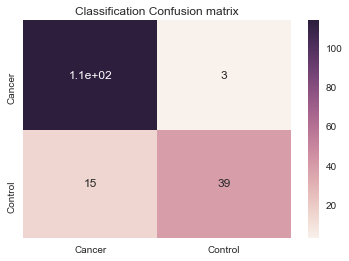

In [38]:
df_cm = pd.DataFrame(cm, index = ['Cancer', 'Control'], columns = ['Cancer', 'Control'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

## Hacemos una comparacion con KNN variando el valor de K vecinos

In [39]:
iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [49]:
for r in range(0,iteraciones_knn):
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scal,ytrain)
    ypred_knn = neigh.predict(xtest_scal)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

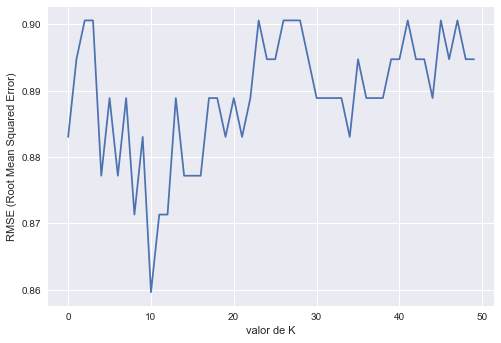

In [50]:
# imprimimos en pantalla el la raiz cuadrada del error cuadratico medio a medida que aumentamos el valor de K
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando varios K)")
plt.show()

# Tarea 01: crear un nuevo set de xtrain y xtest utilizando todas las features posibles

# Tarea 02: Entrenar un KNN y un SVM, ambos con grid search. Comparar resultados de clasificación entre ambos.